In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from understatapi import UnderstatClient
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg


client = UnderstatClient()

In [2]:
player_data = client.player(player='647').get_shot_data()

df = pd.DataFrame(player_data)
df = df[df['season'] == '2024'] # Nur Daten aus der Saison 2024/2025
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1300,586689,10,SavedShot,0.9230000305175782,0.3390000152587891,0.07864826172590256,Harry Kane,a,647,OpenPlay,2024,RightFoot,27749,Wolfsburg,Bayern Munich,2,3,2024-08-25 13:30:00,Michael Olise,Pass
1301,586707,79,BlockedShot,0.915,0.5179999923706055,0.10775043815374374,Harry Kane,a,647,OpenPlay,2024,RightFoot,27749,Wolfsburg,Bayern Munich,2,3,2024-08-25 13:30:00,Kingsley Coman,Cross
1302,590031,34,BlockedShot,0.924000015258789,0.5670000076293945,0.0526578351855278,Harry Kane,h,647,OpenPlay,2024,Head,27759,Bayern Munich,Freiburg,2,0,2024-09-01 15:30:00,Michael Olise,Aerial
1303,590032,37,Goal,0.885,0.5,0.75777667760849,Harry Kane,h,647,Penalty,2024,RightFoot,27759,Bayern Munich,Freiburg,2,0,2024-09-01 15:30:00,None,Standard
1304,590044,92,BlockedShot,0.9030000305175782,0.5690000152587891,0.04919910058379173,Harry Kane,h,647,FromCorner,2024,Head,27759,Bayern Munich,Freiburg,2,0,2024-09-01 15:30:00,Joshua Kimmich,Cross


In [3]:
df['X'] = df['X'].astype(float) * 100
df['Y'] = df['Y'].astype(float) * 100

df['xG'] = pd.to_numeric(df['xG'], errors='coerce')

In [4]:
total_shots = df.shape[0] # Anzahl der Reihen ist die Anzahl der Schüsse
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = (120 - (df['X'] * 1.2).mean()) * 0.9144 #in Metern
conversion_efficiency = total_goals / total_xG if total_xG else 0


## verschiedene Schusstypen

In [5]:
background_color = '#F2F2F2'

# Schuss-Map

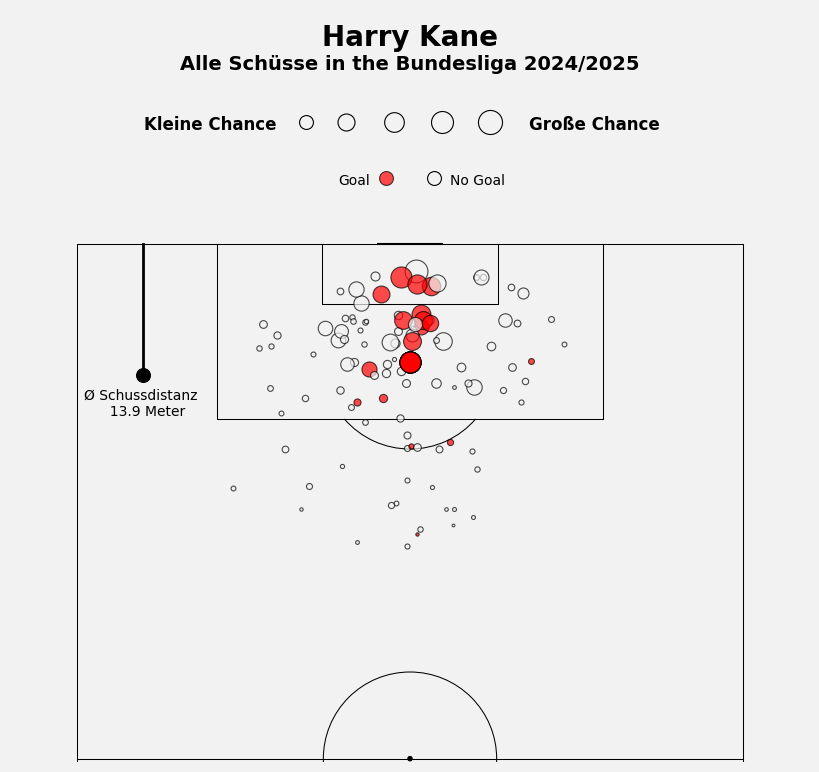

In [6]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x=.5,
    y=.85,
    s='Harry Kane',
    fontsize=20,
    fontweight='bold',
    color='black',
    ha='center'
)

ax1.text(
    x=.5,
    y=.75,
    s='Alle Schüsse in the Bundesliga 2024/2025',
    fontsize=14,
    fontweight='bold',
    color='black',
    ha='center'
)

ax1.text(
    x=.25,
    y=.5,
    s='Kleine Chance',
    fontsize=12,
    fontweight='bold',
    color='black',
    ha='center'
)

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_color,
    edgecolor='black',
    linewidth=.8
)
ax1.scatter(
    x=.42,
    y=.53,
    s=150,
    color=background_color,
    edgecolor='black',
    linewidth=.8
)
ax1.scatter(
    x=.48,
    y=.53,
    s=200,
    color=background_color,
    edgecolor='black',
    linewidth=.8
)
ax1.scatter(
    x=.54,
    y=.53,
    s=250,
    color=background_color,
    edgecolor='black',
    linewidth=.8
)
ax1.scatter(
    x=.6,
    y=.53,
    s=300,
    color=background_color,
    edgecolor='black',
    linewidth=.8
)

ax1.text(
    x=.73,
    y=.5,
    s='Große Chance',
    fontsize=12,
    fontweight='bold',
    color='black',
    ha='center'
)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    color='black', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='black', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='black', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    color='black', 
    ha='left'
)



ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='black',
    linewidth=.75,
    axis=True,
    label=True
)

pitch.draw(ax=ax2)

ax2.scatter(x=90,y=points_average_distance,
            s=100, color='black', linewidth=.8)

ax2.plot([90,90], [100, points_average_distance], color='black', linewidth=2)

ax2.text(
    x=90, y=points_average_distance-4,
    s=f'Ø Schussdistanz \n {actual_average_distance: .1f} Meter',
    fontsize=10, color='black', ha='center'
)

for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='black'
    )

for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')